<a href="https://colab.research.google.com/github/nabilafirdaiss/cbffilm/blob/main/cbf_flm_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 8.9 MB/s eta 0:00:00


In [3]:
!pip install tensorflow

In [5]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 26.9 MB/s eta 0:00:00


In [6]:
import pandas as pd
import numpy as np
import re
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from tabulate import tabulate
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense


In [7]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [8]:
file_path = "/content/drive/MyDrive/dataset/datasetimdb.csv"
df = pd.read_csv(file_path)

print("Kolom dataset:", df.columns.tolist())
print("Jumlah data:", len(df))
df.head()

Kolom dataset: ['Judul', 'Tahun_Rilis', 'Rating_IMDb', 'Genre', 'Durasi', 'Sutradara', 'Aktor', 'Negara', 'Sinopsis']
Jumlah data: 5844


,Judul,Tahun_Rilis,Rating_IMDb,Genre,Durasi,Sutradara,Aktor,Negara,Sinopsis
0,The Bourne Identity,2002,7.8,"Action, Mystery, Thriller",119 min,Doug Liman,"Franka Potente, Matt Damon, Chris Cooper","Czech Republic, Germany, United States","A man is picked up by a fishing boat, bullet-r..."
1,Memento,2000,8.4,"Drama, Mystery, Thriller",113 min,Christopher Nolan,"Guy Pearce, Carrie-Anne Moss, Joe Pantoliano",United States,A former insurance investigator who now suffer...
2,Requiem for a Dream,2000,8.3,Drama,102 min,Darren Aronofsky,"Ellen Burstyn, Jared Leto, Jennifer Connelly",United States,The drug-induced utopias of four Coney Island ...
3,"Crouching Tiger, Hidden Dragon",2000,7.9,"Action, Adventure, Drama",120 min,Ang Lee,"Chow Yun-Fat, Michelle Yeoh, Ziyi Zhang","China, Taiwan, Hong Kong, United States",A young Chinese warrior steals a sword from a ...
4,Amélie,2001,8.3,"Comedy, Romance",122 min,Jean-Pierre Jeunet,"Audrey Tautou, Mathieu Kassovitz, Rufus","France, Germany","Despite being caught in her imaginative world,..."


#EDA

## 1. Inspeksi Data Awal

### Ringkasan Tipe Data dan Nilai Non-Null (df.info()):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5844 entries, 0 to 5843
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Judul        5842 non-null   object 
 1   Tahun_Rilis  5840 non-null   object 
 2   Rating_IMDb  3449 non-null   float64
 3   Genre        5390 non-null   object 
 4   Durasi       4281 non-null   object 
 5   Sutradara    5420 non-null   object 
 6   Aktor        5441 non-null   object 
 7   Negara       5794 non-null   object 
 8   Sinopsis     4811 non-null   object 
dtypes: float64(1), object(8)
memory usage: 411.0+ KB

### Jumlah Nilai Hilang (Missing Values) per Kolom:
Rating_IMDb    2395
Durasi         1563
Sinopsis       1033
Genre           454
Sutradara       424
Aktor           403
Negara           50
Tahun_Rilis       4
Judul             2
dtype: int64

### Statistik Deskriptif (hanya kolom numerik, ji

/tmp/ipython-input-3025739308.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=all_genres.nlargest(10).values,
/tmp/ipython-input-3025739308.py:43: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3025739308.py:44: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  plt.savefig(os.path.join(save_dir, 'top_10_genre.png'))
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


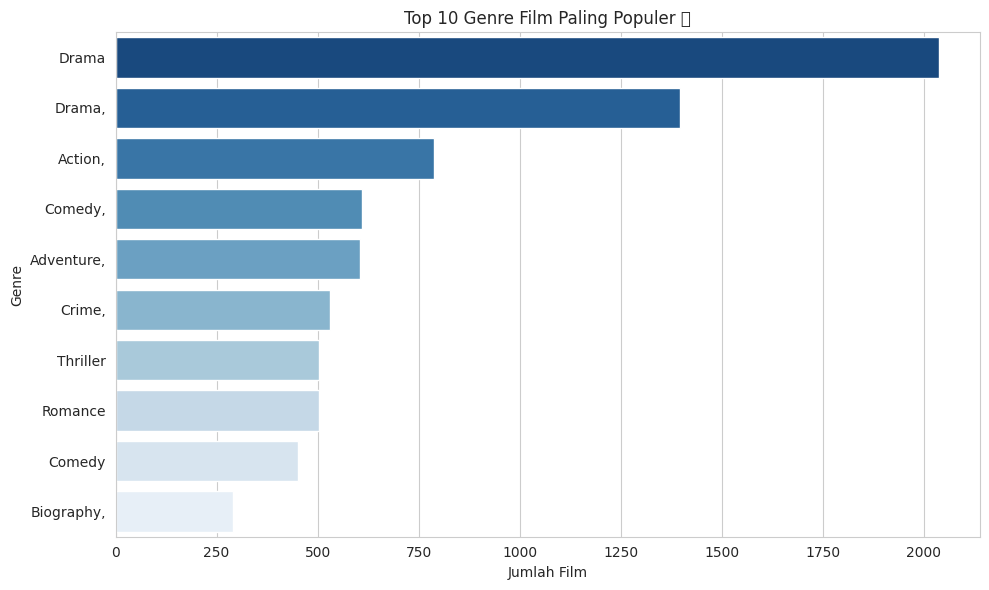

/tmp/ipython-input-3025739308.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=all_directors.values, y=all_directors.index, palette="Oranges_r")
/tmp/ipython-input-3025739308.py:55: UserWarning: Glyph 127909 (\N{MOVIE CAMERA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3025739308.py:56: UserWarning: Glyph 127909 (\N{MOVIE CAMERA}) missing from font(s) DejaVu Sans.
  plt.savefig(os.path.join(save_dir, 'top_10_director.png'))
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127909 (\N{MOVIE CAMERA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


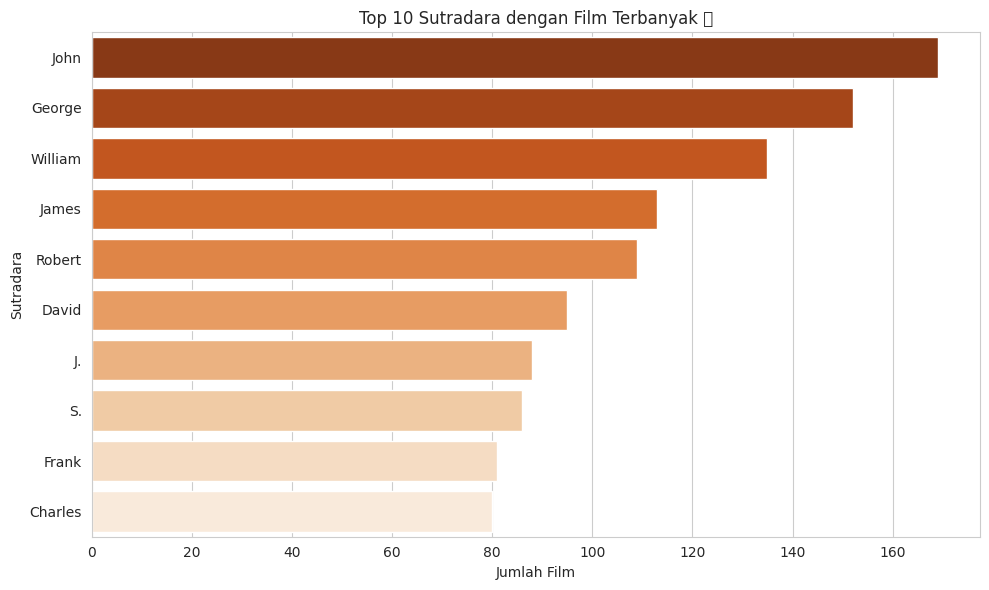

/tmp/ipython-input-3025739308.py:65: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3025739308.py:66: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  plt.savefig(os.path.join(save_dir, 'top_10_country.png'))
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


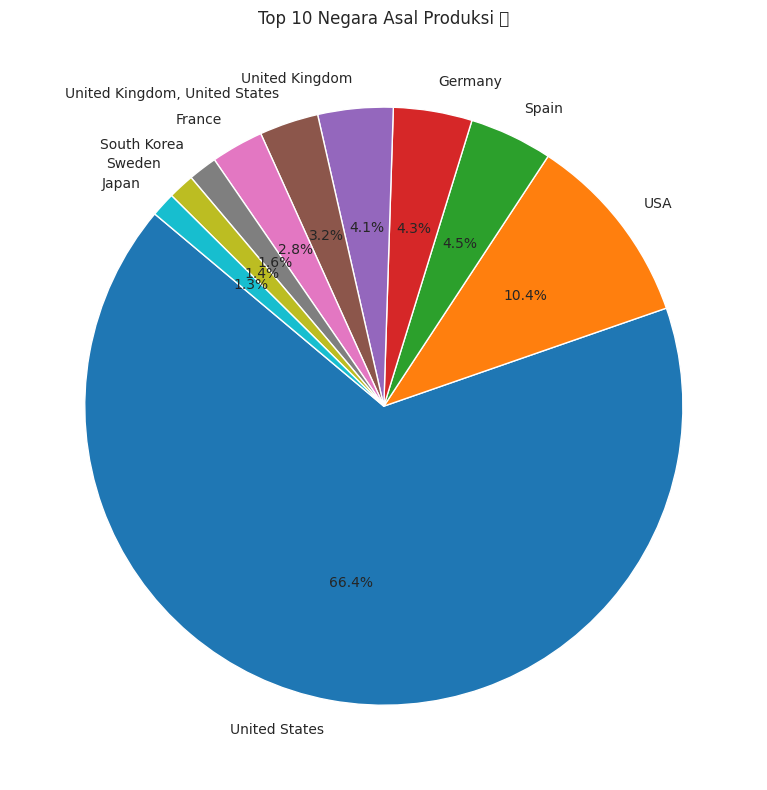

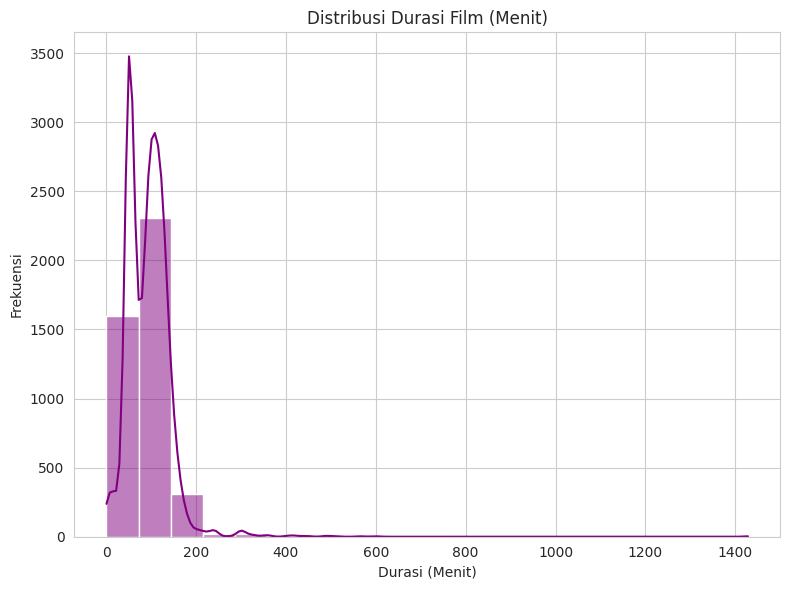

In [11]:
save_dir = '/content/drive/MyDrive/dataset/EDAfilm'
os.makedirs(save_dir, exist_ok=True)

sns.set_style("whitegrid")

# =================================================================
print("## 1. Inspeksi Data Awal")
# =================================================================
print("\n### Ringkasan Tipe Data dan Nilai Non-Null (df.info()):")
df.info()

print("\n### Jumlah Nilai Hilang (Missing Values) per Kolom:")
print(df.isnull().sum().sort_values(ascending=False))

print("\n### Statistik Deskriptif (hanya kolom numerik, jika ada):")
print(df.describe())

# =================================================================
print("\n## 2. Pembersihan & Transformasi Data")
# =================================================================
if 'Durasi' in df.columns:
    print("\n### Membersihkan dan Mengubah Kolom 'Durasi' menjadi Numerik (duration_min)")
    df['Durasi'] = df['Durasi'].replace('', np.nan)
    df['duration_min'] = df['Durasi'].str.replace(' min', '', regex=False)
    df['duration_min'] = pd.to_numeric(df['duration_min'], errors='coerce')
    print(f"Rata-rata Durasi Film: {df['duration_min'].mean():.2f} menit")
    print(f"Median Durasi Film: {df['duration_min'].median():.0f} menit")

# =================================================================
print("\n## 3. Analisis Univariat & Visualisasi")
# =================================================================

# ---  Visualisasi Top 10 Genre ---
if 'Genre' in df.columns:
    plt.figure(figsize=(10, 6))
    all_genres = df['Genre'].str.split(' ', expand=True).stack().value_counts()
    sns.barplot(x=all_genres.nlargest(10).values,
                y=all_genres.nlargest(10).index,
                palette="Blues_r")
    plt.title('Top 10 Genre Film Paling Populer 🎬')
    plt.xlabel('Jumlah Film')
    plt.ylabel('Genre')
    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, 'top_10_genre.png'))
    plt.show()

# ---  Visualisasi Top 10 Sutradara (horizontal bar) ---
if 'Sutradara' in df.columns:
    plt.figure(figsize=(10, 6))
    all_directors = df['Sutradara'].str.split(' ', expand=True).stack().value_counts().nlargest(10)
    sns.barplot(x=all_directors.values, y=all_directors.index, palette="Oranges_r")
    plt.title('Top 10 Sutradara dengan Film Terbanyak 🎥')
    plt.xlabel('Jumlah Film')
    plt.ylabel('Sutradara')
    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, 'top_10_director.png'))
    plt.show()

# ---  Visualisasi Negara (Pie Chart) ---
if 'Negara' in df.columns:
    plt.figure(figsize=(8, 8))
    top_countries = df['Negara'].value_counts().nlargest(10)
    plt.pie(top_countries, labels=top_countries.index, autopct='%1.1f%%', startangle=140)
    plt.title('Top 10 Negara Asal Produksi 🌍')
    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, 'top_10_country.png'))
    plt.show()

# ---  Visualisasi Durasi Film (Histogram + KDE) ---
if 'duration_min' in df.columns and df['duration_min'].notnull().any():
    plt.figure(figsize=(8, 6))
    sns.histplot(df['duration_min'].dropna(), bins=20, kde=True, color='purple')
    plt.title('Distribusi Durasi Film (Menit)')
    plt.xlabel('Durasi (Menit)')
    plt.ylabel('Frekuensi')
    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, 'duration_distribution.png'))
    plt.show()


# **PREPROCESING**

In [12]:

# Hapus NaN
df.fillna('', inplace=True)

# Kolom teks yang akan diproses
text_cols = ['Genre', 'Sutradara', 'Aktor', 'Sinopsis']

# Bersihkan teks
def clean_text(text):
    text = text.lower()                    # lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text) # hapus simbol dan angka
    text = re.sub(r'\s+', ' ', text)        # hapus spasi ganda
    return text.strip()

for col in text_cols:
    df[col] = df[col].apply(clean_text)

# Gabungkan fitur teks jadi satu kolom
df['combined_features'] = (
    df['Genre'] + ' ' +
    df['Sutradara'] + ' ' +
    df['Aktor'] + ' ' +
    df['Sinopsis']
)

# Cek hasil
df[['Judul', 'combined_features']].head()

/tmp/ipython-input-3385038943.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna('', inplace=True)


,Judul,combined_features
0,The Bourne Identity,action mystery thriller doug liman franka pote...
1,Memento,drama mystery thriller christopher nolan guy p...
2,Requiem for a Dream,drama darren aronofsky ellen burstyn jared let...
3,"Crouching Tiger, Hidden Dragon",action adventure drama ang lee chow yunfat mic...
4,Amélie,comedy romance jeanpierre jeunet audrey tautou...


In [13]:
save_path = "/content/drive/MyDrive/dataset/imdb_preprocessed.csv"
df.to_csv(save_path, index=False, encoding='utf-8')
print("✅ Preprocessing selesai!")
print("File hasil disimpan di:", save_path)


✅ Preprocessing selesai!
File hasil disimpan di: /content/drive/MyDrive/dataset/imdb_preprocessed.csv


#Feature Extraction

Tf-Idf

In [14]:
tfidf = TfidfVectorizer(
    stop_words='english',
    max_features=5000
)

tfidf_matrix = tfidf.fit_transform(df['combined_features'])
print(tfidf.get_feature_names_out()[:20])



['aaron' 'abandon' 'abandoned' 'abandons' 'abbott' 'abe' 'abel'
 'abilities' 'ability' 'abraham' 'abramson' 'absence' 'absorbed' 'abused'
 'abusive' 'accept' 'accepts' 'accident' 'accidentally' 'accompanies']


In [15]:
tfidf_df = pd.DataFrame(
    tfidf_matrix.toarray(),
    columns=tfidf.get_feature_names_out()
)

# Tampilkan beberapa baris awal
tfidf_df.head()

,aaron,abandon,abandoned,abandons,abbott,abe,abel,abilities,ability,abraham,...,zellweger,zemeckis,zetajones,zhang,zhao,ziyi,zoe,zombie,zuckerberg,zwick
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.19699,0.0,0.225221,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0


Word2Vec

In [16]:
tokenized_features = [word_tokenize(text) for text in df['combined_features']]
print(tokenized_features[:2])

model_w2v = Word2Vec(
    sentences=tokenized_features,
    vector_size=100,  # Ukuran vektor (misalnya 100)
    window=5,
    min_count=1,
    workers=4
)
print(f"Jumlah kata unik yang dipelajari: {len(model_w2v.wv)}")
print("=======menampilkan beberapa hasil model=======")
print("Kata yang paling mirip dengan 'action':")
# topn=5 akan menampilkan 5 kata teratas
print(model_w2v.wv.most_similar('action', topn=5))

print("\nKata yang paling mirip dengan 'romance':")
print(model_w2v.wv.most_similar('romance', topn=5))

# Menguji apakah Word2Vec bisa mengidentifikasi kata yang tidak sesuai dalam sebuah kelompok
words_to_test = ['fantasy', 'magic', 'adventure', 'robot']
print(f"\nKata yang paling tidak cocok dari {words_to_test}:")
print(model_w2v.wv.doesnt_match(words_to_test))

[['action', 'mystery', 'thriller', 'doug', 'liman', 'franka', 'potente', 'matt', 'damon', 'chris', 'cooper', 'a', 'man', 'is', 'picked', 'up', 'by', 'a', 'fishing', 'boat', 'bulletriddled', 'and', 'suffering', 'from', 'amnesia', 'before', 'racing', 'to', 'elude', 'assassins', 'and', 'attempting', 'to', 'regain', 'his', 'memory'], ['drama', 'mystery', 'thriller', 'christopher', 'nolan', 'guy', 'pearce', 'carrieanne', 'moss', 'joe', 'pantoliano', 'a', 'former', 'insurance', 'investigator', 'who', 'now', 'suffers', 'from', 'anterograde', 'amnesia', 'uses', 'notes', 'and', 'tattoos', 'to', 'hunt', 'down', 'his', 'wifes', 'murderer']]
Jumlah kata unik yang dipelajari: 23456
=======menampilkan beberapa hasil model=======
Kata yang paling mirip dengan 'action':
[('mystery', 0.9995844960212708), ('horror', 0.9994244575500488), ('fantasy', 0.999366044998169), ('scifi', 0.9993345737457275), ('comedy', 0.9993000626564026)]

Kata yang paling mirip dengan 'romance':
[('comedy', 0.9993715882301331),

In [17]:


def document_vector(model, tokenized_doc):
    """
    Menghitung vektor rata-rata dari semua kata dalam sebuah dokumen.
    """
    # Filter kata yang tidak ada di dalam vocabulary model
    words = [word for word in tokenized_doc if word in model.wv.key_to_index]

    if not words:
        # Jika dokumen kosong atau semua kata tidak dikenal
        return np.zeros(model.vector_size)

    # Ambil vektor untuk semua kata yang valid
    word_vectors = model.wv[words]

    # Hitung rata-rata vektor
    return np.mean(word_vectors, axis=0)

# Terapkan fungsi untuk setiap film
movie_vectors = [document_vector(model_w2v, doc) for doc in tokenized_features]

# Konversi ke array NumPy
movie_vector_matrix = np.array(movie_vectors)

print(f"Bentuk Matriks Vektor Film (Word2Vec): {movie_vector_matrix.shape}")

Bentuk Matriks Vektor Film (Word2Vec): (5844, 100)


#Deep Learning LSTM

In [18]:
texts = df['combined_features'].tolist()

# Konfigurasi Tokenizer & Padding
MAX_WORDS = 10000
MAX_SEQUENCE_LENGTH = 200
EMBEDDING_DIM = 128

# Tokenizer
tokenizer = Tokenizer(num_words=MAX_WORDS, oov_token="<unk>")
tokenizer.fit_on_texts(texts)

# Convert ke sequence
sequences = tokenizer.texts_to_sequences(texts)

# Padding
padded_sequences = pad_sequences(
    sequences,
    maxlen=MAX_SEQUENCE_LENGTH,
    padding='post',
    truncating='post'
)

VOCAB_SIZE = len(tokenizer.word_index) + 1

print("VOCAB SIZE:", VOCAB_SIZE)
print("Shape padded:", padded_sequences.shape)


VOCAB SIZE: 23459
Shape padded: (5844, 200)


In [19]:
# Model Encoder LSTM

# Input
input_seq = Input(shape=(MAX_SEQUENCE_LENGTH,))

# Embedding Layer
x = Embedding(
    input_dim=VOCAB_SIZE,
    output_dim=EMBEDDING_DIM,
    input_length=MAX_SEQUENCE_LENGTH
)(input_seq)

# LSTM
x = LSTM(units=64, return_sequences=False)(x)

# Output embedding 64 dimensi
encoder_model = Model(inputs=input_seq, outputs=x, name='LSTM_Combined_Encoder')

# Summary
encoder_model.summary()

# Hasil embedding untuk semua data
combined_embeddings = encoder_model.predict(padded_sequences)

print("Shape embedding:", combined_embeddings.shape)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "LSTM_Combined_Encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_1 (Embedding)         │ (None, 200, 128)       │     3,002,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,052,160 (11.64 MB)

 Trainable params: 3,052,160 (11.64 MB)

 Non-trainable params: 0 (0.00 B)

183/183 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step
Shape embedding: (5844, 64)


#Cosine Similarity


TF-IDF

In [27]:
cosine_sim = cosine_similarity(tfidf_matrix)

In [28]:
def recommend_movies(user_genre, user_actor, user_director, user_country, top_n=10):
    # Gabungkan input pengguna seperti combined_features
    user_input = f"{user_genre} {user_actor} {user_director} {user_country}"

    # Ubah input pengguna menjadi vektor TF-IDF
    user_vector = tfidf.transform([user_input])

    # Hitung cosine similarity antara input pengguna dan seluruh film
    similarity_scores = cosine_similarity(user_vector, tfidf_matrix).flatten()

    # Urutkan skor dari yang paling mirip
    similar_movies_indices = similarity_scores.argsort()[::-1]

    # Ambil top N rekomendasi
    top_indices = similar_movies_indices[:top_n]

    # Ambil data film
    recommendations = df.iloc[top_indices][['Genre', 'Judul', 'Durasi', 'Sutradara',
                                            'Aktor', 'Negara', 'Sinopsis']].copy()

    # Tambahkan kolom score
    recommendations["Score"] = similarity_scores[top_indices]

    # Reset index biar rapi
    return recommendations.reset_index(drop=True)


Word2Vec

In [ ]:


# Hitung Cosine Similarity pada matriks vektor Word2Vec
cosine_sim_w2v = cosine_similarity(movie_vector_matrix)

# Matriks kesamaan siap digunakan untuk rekomendasi
print(f"Bentuk Matriks Kesamaan Kosinus (Word2Vec): {cosine_sim_w2v.shape}")

Bentuk Matriks Kesamaan Kosinus (Word2Vec): (4843, 4843)


In [25]:
def document_vector(model, tokenized_doc):
    """Menghitung vektor rata-rata dari kata-kata dalam sebuah dokumen."""
    # Filter kata yang ada di vocabulary model Word2Vec
    words = [word for word in tokenized_doc if word in model.wv.key_to_index]

    if not words:
        return np.zeros(model.vector_size)

    # Rata-rata vektor kata-kata yang valid
    word_vectors = model.wv[words]
    return np.mean(word_vectors, axis=0)

def recommend_by_preference_structural(user_genre, user_actor, user_director,
                                       top_n, df, model_w2v, movie_vector_matrix):

    # 1. Gabungkan & tokenisasi input user
    user_input_text = f"{user_genre} {user_actor} {user_director}".lower()
    user_tokenized = word_tokenize(user_input_text)

    # 2. Buat vektor pengguna
    user_vector = document_vector(model_w2v, user_tokenized)

    if np.all(user_vector == 0):
        return pd.DataFrame()

    # 3. Hitung cosine similarity user vs semua film
    user_vector = user_vector.reshape(1, -1)
    similarity_scores = cosine_similarity(user_vector, movie_vector_matrix).flatten()

    # 4. Gabungkan skor ke dataframe rekomendasi
    recommendation_df = pd.DataFrame({
        'Judul': df['Judul'],
        'Score': similarity_scores,
        'Original_Index': df.index
    })

    # 5. Urutkan menurut Score tertinggi
    recommended_sorted = recommendation_df.sort_values(by='Score', ascending=False)

    # Ambil indeks asli film yang terpilih
    top_indices = recommended_sorted['Original_Index'].head(top_n).tolist()

    # 6. Ambil data film lengkap dari df
    final_recommendations = df.loc[top_indices].copy()

    # 7. MASUKKAN kolom Score ke dalam dataframe akhir
    score_map = recommended_sorted.set_index('Original_Index')['Score'].to_dict()
    final_recommendations['Score'] = final_recommendations.index.map(score_map)

    # 8. Atur kolom tampilannya
    kolom_tampilan = ['Genre', 'Judul', 'Durasi', 'Sutradara', 'Aktor', 'Negara', 'Sinopsis', 'Score']
    kolom_final = [col for col in kolom_tampilan if col in final_recommendations.columns]

    # Return final tabel lengkap + skor
    return final_recommendations[kolom_final].reset_index(drop=True)



#Uji Kasus


Tf-Idf

In [29]:
print("\n🎥 Sistem Rekomendasi Film Berdasarkan Preferensi Anda 🎥")
user_genre = input("Masukkan genre favorit Anda: ")
user_actor = input("Masukkan aktor favorit Anda: ")
user_director = input("Masukkan sutradara favorit Anda: ")
user_country = input("Masukkan negara film yang Anda sukai: ")

print("\n📽️ Film yang direkomendasikan untuk Anda:\n")
recommended = recommend_movies(user_genre, user_actor, user_director, user_country, top_n=10)

if not recommended.empty:
    print(tabulate(recommended, headers='keys', tablefmt='grid', showindex=False))
else:
    print("❌ Tidak ditemukan film yang cocok dengan preferensi Anda.")



🎥 Sistem Rekomendasi Film Berdasarkan Preferensi Anda 🎥
Masukkan genre favorit Anda: action
Masukkan aktor favorit Anda: chris
Masukkan sutradara favorit Anda: ang lee
Masukkan negara film yang Anda sukai: 

📽️ Film yang direkomendasikan untuk Anda:

+-------------------------+--------------------------------+----------+-------------+------------------------------------------------+--------------------------------------------------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------+
| Genre                   | Judul                          | Durasi   | Sutradara   | Aktor                                          | Negara                                                       | Sinopsis                                                                                                                                     

Word2Vec

In [26]:


print("\n🎥 Sistem Rekomendasi Film Berdasarkan Preferensi Anda 🎥")
user_genre = input("Masukkan genre favorit Anda: ")
user_actor = input("Masukkan aktor favorit Anda: ")
user_director = input("Masukkan sutradara favorit Anda: ")
user_country = input("Masukkan negara film yang Anda sukai: ") # Input ini tidak digunakan untuk perbandingan, tapi untuk melengkapi output.

print("\n📽️ Film yang direkomendasikan untuk Anda:\n")
# Panggil fungsi rekomendasi yang baru
recommended = recommend_by_preference_structural(
    user_genre=user_genre,
    user_actor=user_actor,
    user_director=user_director,
    top_n=10,
    df=df,
    model_w2v=model_w2v,
    movie_vector_matrix=movie_vector_matrix,

)

if not recommended.empty:
    # Tampilkan output yang sudah memiliki kolom spesifik
    print(tabulate(recommended, headers='keys', tablefmt='github', showindex=False))
else:
    print("❌ Tidak ditemukan film yang cocok dengan preferensi Anda atau kata kunci tidak spesifik.")


🎥 Sistem Rekomendasi Film Berdasarkan Preferensi Anda 🎥
Masukkan genre favorit Anda: action
Masukkan aktor favorit Anda: chris
Masukkan sutradara favorit Anda: ang lee
Masukkan negara film yang Anda sukai: 

📽️ Film yang direkomendasikan untuk Anda:

| Genre                  | Judul                      | Durasi   | Sutradara              | Aktor                                              | Negara         | Sinopsis   |    Score |
|------------------------|----------------------------|----------|------------------------|----------------------------------------------------|----------------|------------|----------|
| action crime           | Der goldene Pol            |          | rudolf meinert         | hans mierendorff ernst behmer ria jende            | Germany        |            | 0.999837 |
| action drama           | The Bull's Eye             |          | james w horne          | eddie polo vivian reed frank lanning               | United States  |            | 0.999823 |
| ac

LSTM

In [20]:
def recommend_movies_lstm(user_genre, user_actor, user_director, user_country, top_n=10):

    # 1. Gabungkan input pengguna seperti format combined_features
    # Semua kata kunci digabungkan dan dikonversi ke lowercase.
    user_input = f"{user_genre} {user_actor} {user_director} {user_country}".lower()

    # 2. Ubah input pengguna menjadi urutan integer menggunakan tokenizer yang sama
    # Perhatikan bahwa input ini harus berupa list (bahkan jika hanya 1 string)
    user_sequence = tokenizer.texts_to_sequences([user_input])

    # 3. Padding urutan input pengguna
    # Harus menggunakan MAX_SEQUENCE_LENGTH yang sama
    user_padded = pad_sequences(
        user_sequence,
        maxlen=MAX_SEQUENCE_LENGTH,
        padding='post',
        truncating='post'
    )

    # 4. Ubah input pengguna menjadi Dense Vector (Embedding) menggunakan LSTM Encoder
    # Vector ini adalah user profile representation
    user_vector = encoder_model.predict(user_padded) # user_vector.shape akan menjadi (1, 64)

    # 5. Hitung cosine similarity antara input pengguna (user_vector) dan seluruh film (synopsis_embeddings)
    # Gunakan user_vector (1, D) dan synopsis_embeddings (N, D)
    similarity_scores = cosine_similarity(user_vector, synopsis_embeddings) # Output shape: (1, N_films)

    # 6. Urutkan skor dari yang paling mirip (tertinggi)
    # [0] mengambil array skor, argsort() mengembalikan indeks yang diurutkan, [::-1] membaliknya
    similar_movies_indices = similarity_scores[0].argsort()[::-1]

    # 7. Ambil top N rekomendasi
    recommended_indices = similar_movies_indices[:top_n]

    # Ambil skor kesamaan untuk ditampilkan (opsional)
    similarity_scores_top = similarity_scores[0][recommended_indices]

    # Ambil data film berdasarkan urutan indeks
    recommendations = df.iloc[recommended_indices].copy()

    # Tambahkan skor kesamaan untuk evaluasi
    recommendations['Similarity_Score_LSTM'] = similarity_scores_top

    # Kolom yang akan ditampilkan (sesuaikan dengan kolom df Anda)
    display_cols = ['Judul', 'Genre', 'Sutradara', 'Aktor', 'Negara', 'Rating_IMDb', 'Similarity_Score_LSTM']

    # Filter kolom yang benar-benar ada di DataFrame
    valid_cols = [col for col in display_cols if col in recommendations.columns]

    return recommendations[valid_cols]

In [22]:
print("\n🎥 Sistem Rekomendasi Film Berdasarkan Preferensi Anda (Menggunakan LSTM Embedding) 🎥")

user_genre = "Action"
user_actor = "chris"
user_director = "ang lee"
user_country = ""
print(f"Masukkan genre favorit Anda: {user_genre}")
print(f"Masukkan aktor favorit Anda: {user_actor}")
print(f"Masukkan sutradara favorit Anda: {user_director}")
print(f"Masukkan negara film yang Anda sukai: {user_country}")
# -------------------------------------------------------------

print("\n📽️ Film yang direkomendasikan untuk Anda:\n")
# Panggil fungsi yang menggunakan LSTM
recommended = recommend_movies_lstm(user_genre, user_actor, user_director, user_country, top_n=10)

if not recommended.empty:
    print(tabulate(recommended, headers='keys', tablefmt='grid', showindex=False))
else:
    print("❌ Tidak ditemukan film yang cocok dengan preferensi Anda.")


🎥 Sistem Rekomendasi Film Berdasarkan Preferensi Anda (Menggunakan LSTM Embedding) 🎥
Masukkan genre favorit Anda: Action
Masukkan aktor favorit Anda: chris
Masukkan sutradara favorit Anda: ang lee
Masukkan negara film yang Anda sukai: 

📽️ Film yang direkomendasikan untuk Anda:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
+------------------------------+---------------+----------------------------+------------------------------------------------+---------------+---------------+-------------------------+
| Judul                        | Genre         | Sutradara                  | Aktor                                          | Negara        | Rating_IMDb   |   Similarity_Score_LSTM |
+==============================+===============+============================+================================================+===============+===============+=========================+
| Milestones                   | drama history | john douglas robert kramer | mary chapelle sharon krebs jim nolfi           |